## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from datetime import date

## Load data

In [ ]:
tor_cal = pd.read_csv('Tcalendar.csv')
tor_list = pd.read_csv('Tlistings.csv')
van_cal = pd.read_csv('Vcalendar.csv')
van_list = pd.read_csv('Vlistings.csv')
# This will be mainly used as trend comparison
tor_cal2020 = pd.read_csv('Tcalendar2020.csv')
van_cal2020 = pd.read_csv('Vcalendar2020.csv')

# Data information

In [ ]:
# number of column in datasets
print(f'unmber of column tor_list : {len(tor_list.columns)}')
print(f'number of column van_list : {len(van_list.columns)}')
print(f'number of column tor_cal :{len(tor_cal.columns)}')
print(f'number of column van_cal :{len(van_cal.columns)}')

unmber of column tor_list : 74
number of column van_list : 74
number of column tor_cal :7
number of column van_cal :7


### Vancouver

#### Calender.csv

In [ ]:
van_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,703179,2021-02-10,t,$97.00,$97.00,3,60
1,1936740,2021-02-10,f,$70.00,$70.00,30,1124
2,1936740,2021-02-11,f,$70.00,$70.00,30,1124
3,1936740,2021-02-12,f,$70.00,$70.00,30,1124
4,1936740,2021-02-13,f,$70.00,$70.00,30,1124


In [ ]:
van_cal.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [ ]:
print(van_cal[van_cal.columns[van_cal.isnull().any()]].isnull().sum())
print(pd.isnull(van_cal).sum()/len(van_cal))

Series([], dtype: float64)
listing_id        0.0
date              0.0
available         0.0
price             0.0
adjusted_price    0.0
minimum_nights    0.0
maximum_nights    0.0
dtype: float64


In [ ]:
print(f"number of unique id  : {len(van_cal.listing_id.unique())}")
print(f"range of time  : {pd.to_datetime(van_cal['date']).min()}")
print(f"range of time  :{pd.to_datetime(van_cal['date']).max()}")
print(f"number of days  :{len(van_cal.date.unique())}")

number of unique id  : 4340
range of time  : 2021-02-09 00:00:00
range of time  :2022-02-09 00:00:00
number of days  :366


#### Listings.csv

In [ ]:
van_list.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10080,https://www.airbnb.com/rooms/10080,20210209201357,2021-02-10,D1 - Million Dollar View 2 BR,"Stunning two bedroom, two bathroom apartment. ...",NaN,https://a0.muscache.com/pictures/55778229/c2f7...,30899,https://www.airbnb.com/users/show/30899,...,9.0,10.0,9.0,18-476608,f,41,41,0,0,0.14
1,13358,https://www.airbnb.com/rooms/13358,20210209201357,2021-02-10,Monthly (or Longer ) Designer One Bedroom Down...,<b>The space</b><br />This suites central loca...,NaN,https://a0.muscache.com/pictures/c23bb7ef-e300...,52116,https://www.airbnb.com/users/show/52116,...,10.0,10.0,9.0,18-611603,f,1,1,0,0,3.32
2,13490,https://www.airbnb.com/rooms/13490,20210209201357,2021-02-10,Vancouver's best kept secret,This apartment rents for one month blocks of t...,"In the heart of Vancouver, this apartment has ...",https://a0.muscache.com/pictures/73394727/79d5...,52467,https://www.airbnb.com/users/show/52467,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.75
3,14267,https://www.airbnb.com/rooms/14267,20210209201357,2021-02-10,EcoLoft Vancouver,"The Ecoloft is located in the lovely, family r...",We live in the centre of the city of Vancouver...,https://a0.muscache.com/pictures/3646de9b-934e...,56030,https://www.airbnb.com/users/show/56030,...,9.0,10.0,9.0,18-554072,t,1,1,0,0,0.26
4,16254,https://www.airbnb.com/rooms/16254,20210209201357,2021-02-10,Close to PNE/Hastings Park and East Village,2 Bedroom garden level guest suite.(lower leve...,"Good Eats, Cute Shops and all the personality ...",https://a0.muscache.com/pictures/90623667/583c...,63238,https://www.airbnb.com/users/show/63238,...,10.0,10.0,9.0,19-162421,t,1,1,0,0,0.16


In [ ]:
van_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
data = pd.isnull(van_list).sum()/len(van_list)
print(data.sort_values(ascending=False).head(20))
print(van_list[van_list.columns[van_list.isnull().any()]].isnull().sum())

bathrooms                       1.000000
calendar_updated                1.000000
neighbourhood_group_cleansed    1.000000
host_about                      0.371198
host_response_time              0.324654
host_response_rate              0.324654
license                         0.300461
neighborhood_overview           0.285714
neighbourhood                   0.285714
host_acceptance_rate            0.216359
review_scores_checkin           0.192166
review_scores_cleanliness       0.191935
review_scores_accuracy          0.191935
review_scores_location          0.191935
review_scores_value             0.191935
review_scores_communication     0.191705
review_scores_rating            0.189401
last_review                     0.183410
first_review                    0.183410
reviews_per_month               0.183410
dtype: float64
description                       28
neighborhood_overview           1240
host_name                          1
host_since                         1
host_location    

In [ ]:
print(f"unique ID: {len(van_list.id.unique())}")
print(f"if each ID is only appear once:{van_list.shape}")

unique ID: 4340
if each ID is only appear once:(4340, 74)


### Toronto

#### Calender.csv

In [ ]:
tor_cal.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,778990,2021-02-09,f,$149.00,$149.00,28.0,365.0
1,1419,2021-02-09,f,$469.00,$469.00,28.0,730.0
2,1419,2021-02-10,f,$469.00,$469.00,28.0,730.0
3,1419,2021-02-11,f,$469.00,$469.00,28.0,730.0
4,1419,2021-02-12,f,$469.00,$469.00,28.0,730.0


In [ ]:
tor_cal.columns

Index(['listing_id', 'date', 'available', 'price', 'adjusted_price',
       'minimum_nights', 'maximum_nights'],
      dtype='object')

In [ ]:
print(tor_cal[tor_cal.columns[tor_cal.isnull().any()]].isnull().sum())
print(pd.isnull(tor_cal).sum()/len(tor_cal))

price              194
adjusted_price     194
minimum_nights    1103
maximum_nights    1103
dtype: int64
listing_id        0.000000
date              0.000000
available         0.000000
price             0.000034
adjusted_price    0.000034
minimum_nights    0.000191
maximum_nights    0.000191
dtype: float64


In [ ]:
print(f"number of unique id  : {len(tor_cal.listing_id.unique())}")
print(f"range of time  : {pd.to_datetime(tor_cal['date']).min()}")
print(f"range of time  :{pd.to_datetime(tor_cal['date']).max()}")
print(f"number of days  :{len(tor_cal.date.unique())}")

number of unique id  : 15832
range of time  : 2021-02-08 00:00:00
range of time  :2022-02-10 00:00:00
number of days  :368


#### Listings.csv

In [ ]:
tor_list.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20210208155315,2021-02-09,Beautiful home in amazing area!,"This large, family home is located in one of T...",The apartment is located in the Ossington stri...,https://a0.muscache.com/pictures/76206750/d643...,1565,https://www.airbnb.com/users/show/1565,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.10
1,8077,https://www.airbnb.com/rooms/8077,20210208155315,2021-02-09,Downtown Harbourfront Private Room,Guest room in a luxury condo with access to al...,NaN,https://a0.muscache.com/pictures/11780344/141c...,22795,https://www.airbnb.com/users/show/22795,...,10.0,10.0,10.0,NaN,t,2,1,1,0,1.21
2,23691,https://www.airbnb.com/rooms/23691,20210208155315,2021-02-11,Queen Bedroom close to downtown,<b>The space</b><br />Nestled in the middle of...,NaN,https://a0.muscache.com/pictures/615528/d09ab3...,93825,https://www.airbnb.com/users/show/93825,...,10.0,9.0,10.0,NaN,t,2,0,2,0,1.66
3,27423,https://www.airbnb.com/rooms/27423,20210208155315,2021-02-10,Executive Studio Unit- Ideal for One Person,"Brand new, fully furnished studio basement apa...",NaN,https://a0.muscache.com/pictures/176936/b687ed...,118124,https://www.airbnb.com/users/show/118124,...,10.0,10.0,10.0,NaN,f,1,1,0,0,0.20
4,30931,https://www.airbnb.com/rooms/30931,20210208155315,2021-02-09,Downtown Toronto - Waterview Condo,Split level waterfront condo with a breathtaki...,NaN,https://a0.muscache.com/pictures/227971/e8ebd7...,22795,https://www.airbnb.com/users/show/22795,...,NaN,NaN,NaN,NaN,f,2,1,1,0,0.01


In [ ]:
tor_list.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

In [ ]:
data = pd.isnull(tor_list).sum()/len(tor_list)
print(data.sort_values(ascending=False).head(20))
print(tor_list[tor_list.columns[tor_list.isnull().any()]].isnull().sum())

bathrooms                       1.000000
neighbourhood_group_cleansed    1.000000
calendar_updated                1.000000
license                         0.760927
host_about                      0.436205
host_response_time              0.419909
host_response_rate              0.419909
neighborhood_overview           0.375821
neighbourhood                   0.375821
host_acceptance_rate            0.320427
host_neighbourhood              0.248358
review_scores_accuracy          0.246526
review_scores_checkin           0.246526
review_scores_location          0.246526
review_scores_value             0.246526
review_scores_communication     0.246463
review_scores_cleanliness       0.246400
review_scores_rating            0.244505
last_review                     0.232377
first_review                    0.232377
dtype: float64
name                                1
description                       565
neighborhood_overview            5950
host_name                          16
host_since   

In [ ]:
print(f"unique ID: {len(tor_list.id.unique())}")
print(f"if each ID is only appear once:{tor_list.shape}")

unique ID: 15832
if each ID is only appear once:(15832, 74)


In [ ]:
# new columns in tor_list
for extra in tor_list.columns:
    if extra not in van_list.columns:
        print(extra)
extra

'reviews_per_month'

# Calendar Data Preparation for seasonality analysis


In [ ]:
def cle_cd(df_cd):  
  # drop null values;keep related columns; change prices to integers; change data to daytime;
    df_cd = df_cd.dropna()
    df_cd = df_cd[['listing_id','price','date']]
    df_cd['price'] = [int(str(x).replace('$','').replace(',','').replace('.00','')) for x in df_cd['price']] 
    df_cd['date'] = pd.to_datetime(df_cd['date'])
    return df_cd

In [ ]:
# calendar data cleaning 
tor_cc = cle_cd(tor_cal)
van_cc = cle_cd(van_cal)
tor_cc2020 = cle_cd(tor_cal2020)
van_cc2020 = cle_cd(van_cal2020)

##Price analysis

**Price distribution analysis**

In [ ]:
# function for plot data
def plothist(data, column, city, ax, binsize, ylabel='', xlabel='', color='red',kde=False):
    sns.distplot(data[column], kde=kde, color=color, bins=binsize, ax=ax)    
    ax.set_title(f"{city} - Housing Prices", fontsize=20)
    ax.set_ylabel(ylabel, fontsize=20)
    ax.set_xlabel(xlabel, fontsize=20)

    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(15)
        plt.xticks(rotation= 45)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(15)

C:\Users\marti\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


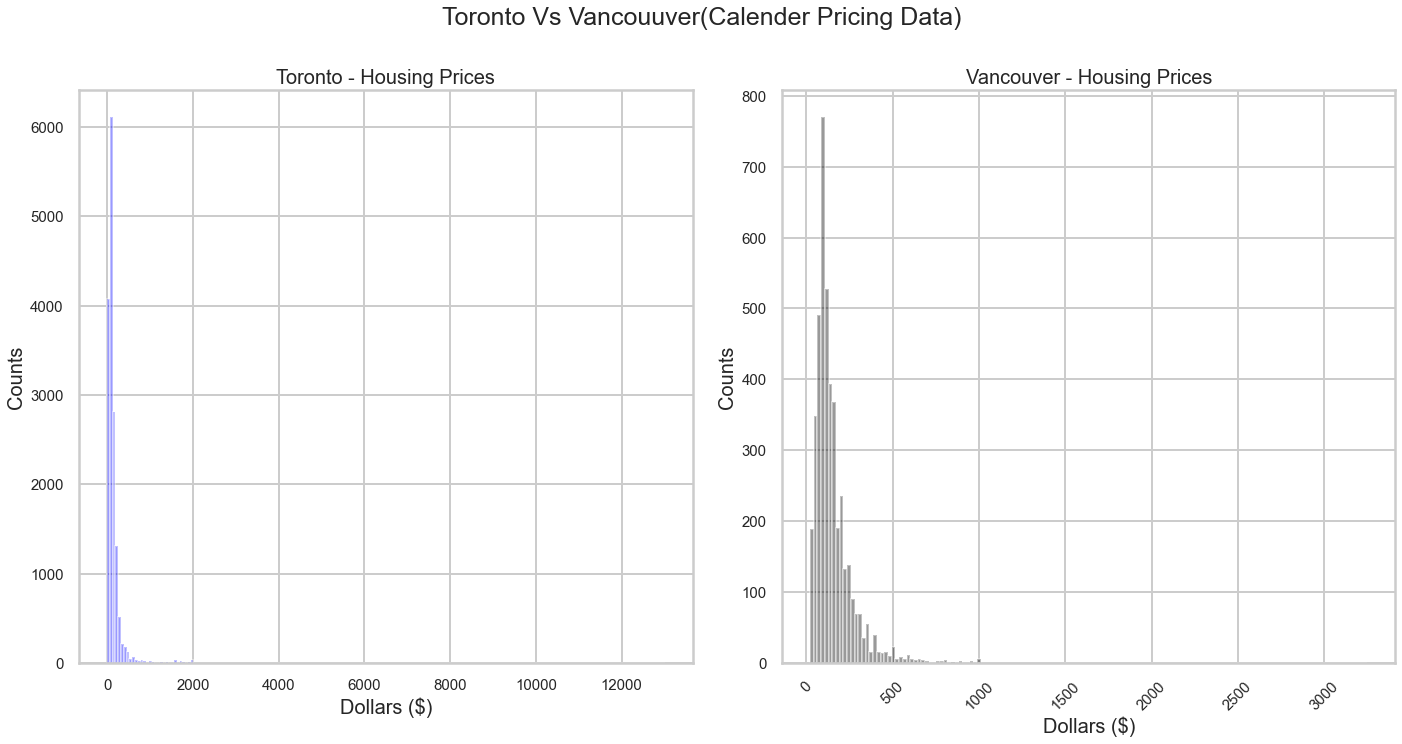

In [ ]:
# plot price in calender overall
tor_p = tor_cc.groupby('listing_id').mean()
van_p = van_cc.groupby('listing_id').mean()
sns.set_theme()
sns.set_context("poster")
sns.set_style("whitegrid")
fig, (ax1, ax2) = plt.subplots(figsize=(20,10), ncols=2)
plt.suptitle("Toronto Vs Vancouuver(Calender Pricing Data)", y = 1.05, fontsize=25)
plothist(tor_p, 'price', 'Toronto', ax1, binsize=200,ylabel='Counts', xlabel='Dollars ($)', color='blue')
plothist(van_p,'price', 'Vancouver', ax2, binsize=150, ylabel='Counts', xlabel='Dollars ($)', color='black')
plt.tight_layout()

C:\Users\marti\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\marti\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

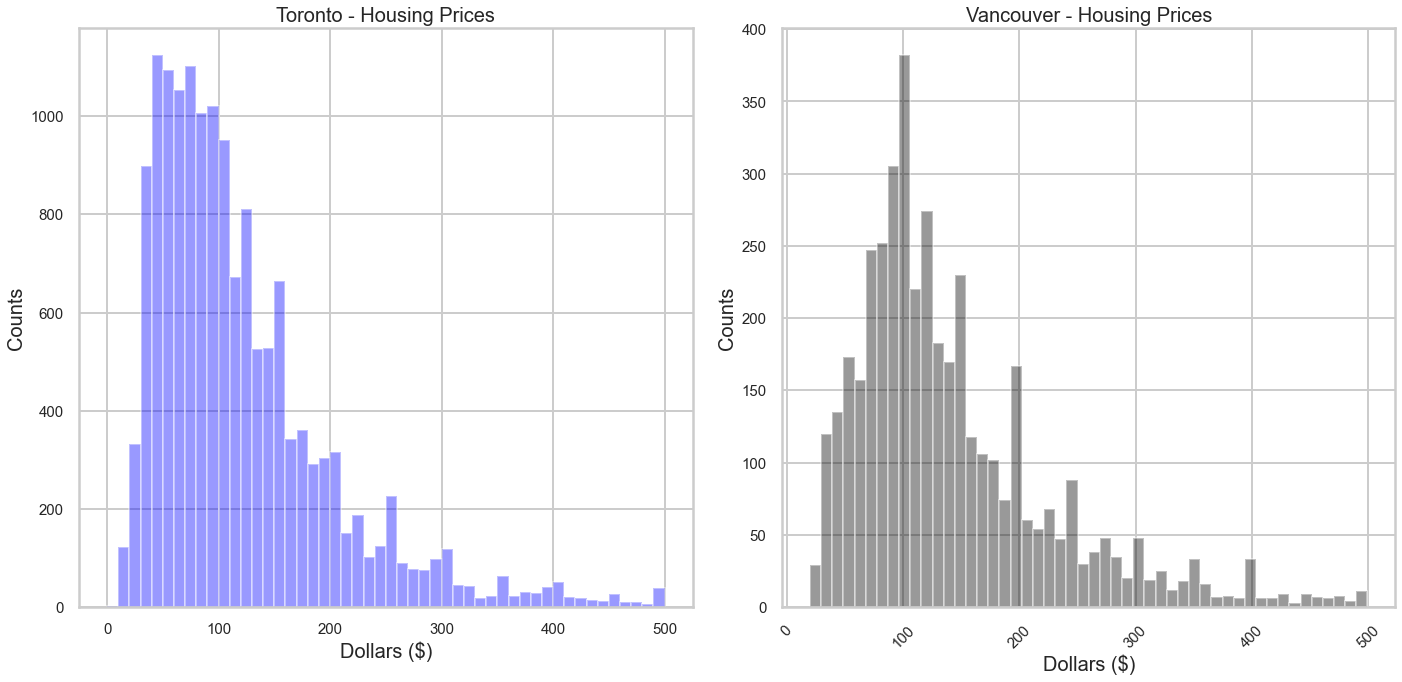

In [ ]:
# Take a look at Toronto under 500, Vancouver under 500
plt.suptitle("Toronto Vs Vancouuver(Calender Pricing Data)- sub range", y = 1.05, fontsize=25)
fig, (ax1, ax2) = plt.subplots(figsize=(20,10), ncols=2)
plothist(tor_p[(tor_p['price'] < 500)], 'price', 'Toronto', ax1, binsize=50,ylabel='Counts', xlabel='Dollars ($)', color='blue')
plothist(van_p[van_p['price'] < 500], 'price', 'Vancouver', ax2, binsize=50,ylabel='Counts', xlabel='Dollars ($)', color='black')
plt.tight_layout()

C:\Users\marti\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\marti\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

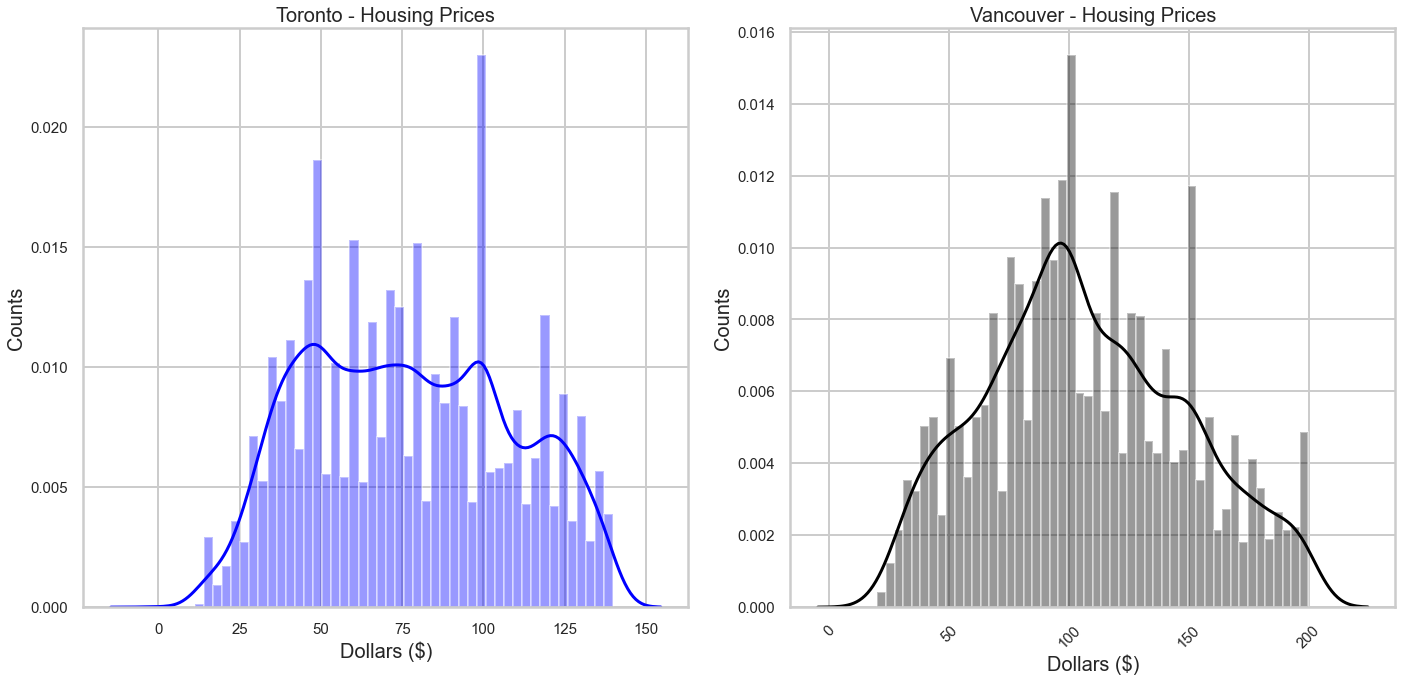

In [ ]:
# Take a look at Toronto under 200, Vancouver under 140
plt.suptitle("Toronto Vs Vancouuver(Calender Pricing Data)- sub range", y = 1.05, fontsize=25)
fig, (ax1, ax2) = plt.subplots(figsize=(20,10), ncols=2)
plothist(tor_p[tor_p['price'] < 140], 'price', 'Toronto', ax1, binsize=50,ylabel='Counts', xlabel='Dollars ($)', color='blue',kde=True)
plothist(van_p[van_p['price'] < 200],'price', 'Vancouver', ax2, binsize=50,ylabel='Counts', xlabel='Dollars ($)', color='black',kde=True)
plt.tight_layout()

C:\Users\marti\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\marti\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

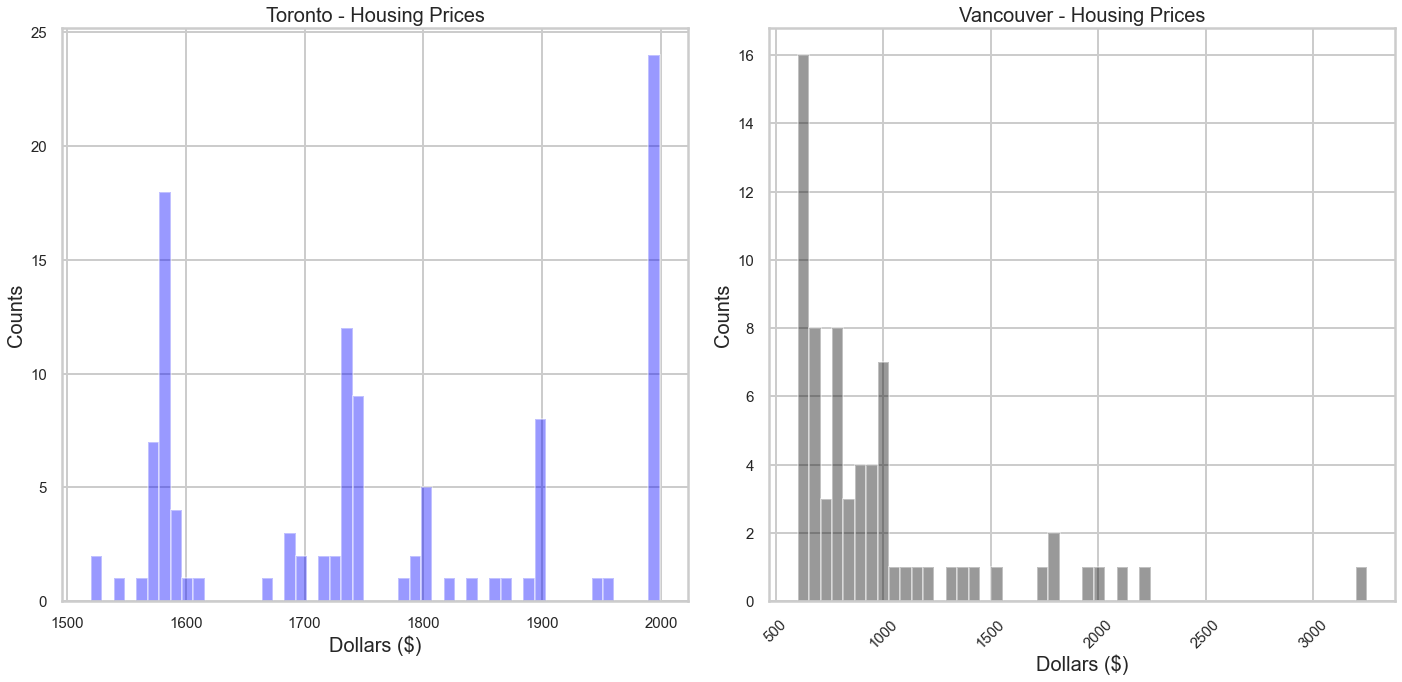

In [ ]:
# Take a look at outliers
# With different Price limits 1500< Toronto < 2000, Vancouver >600
plt.suptitle("Toronto Vs Vancouuver(Calender Pricing Data)- sub range", y = 1.05, fontsize=25)
fig, (ax1, ax2) = plt.subplots(figsize=(20,10), ncols=2)
plothist(tor_p[(tor_p['price'] < 2000) & (tor_p['price']>1500)]  , 'price', 'Toronto', ax1, binsize=50, ylabel='Counts',xlabel='Dollars ($)', color='blue')
plothist(van_p[van_p['price'] >600], 'price', 'Vancouver', ax2, binsize=50,ylabel='Counts', xlabel='Dollars ($)', color='black')
plt.tight_layout()

C:\Users\marti\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<Figure size 432x288 with 0 Axes>

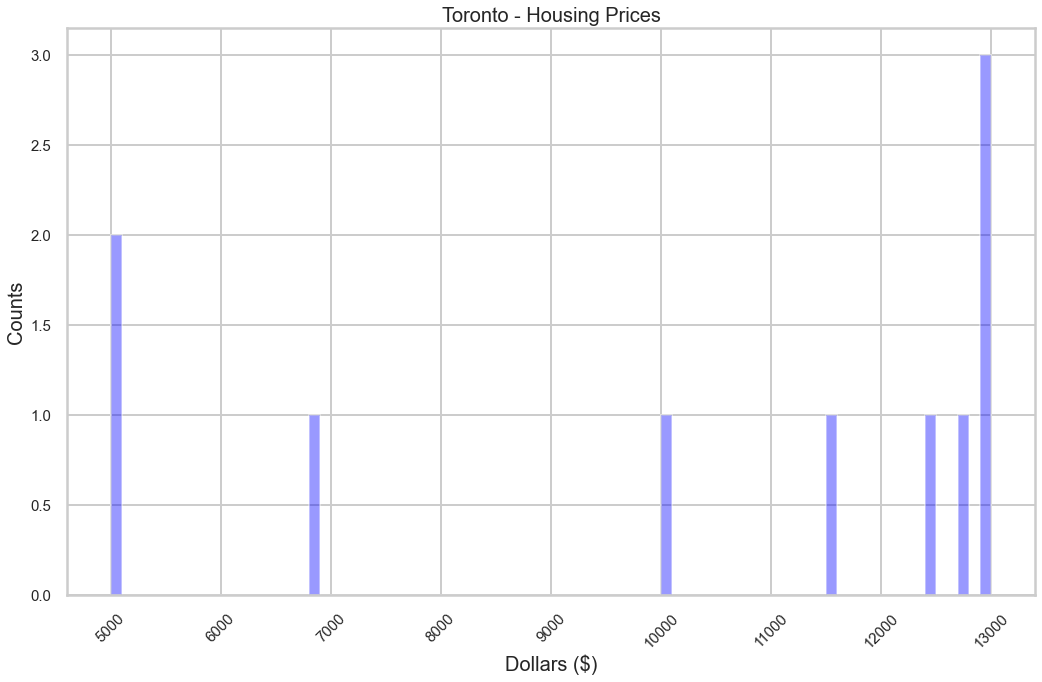

In [ ]:
# more outliers for Toronto > $4000
plt.suptitle("Toronto Vs Vancouuver(Calender Pricing Data)- sub range", y = 1.05, fontsize=25)
fig, ax1 = plt.subplots(figsize=(15,10))
plothist(tor_p[tor_p['price'] > 4000], 'price', 'Toronto', ax1, binsize=80,ylabel='Counts', xlabel='Dollars ($)', color='blue')
plt.tight_layout()

**Price Seasonality**

Firstly, we overview the dataset for Toronto Listing Price.

In [ ]:
tor_cc

,listing_id,price,date
0,778990,149,2021-02-09
1,1419,469,2021-02-09
2,1419,469,2021-02-10
3,1419,469,2021-02-11
4,1419,469,2021-02-12
...,...,...,...
5779776,48078378,179,2022-02-04
5779777,48078378,179,2022-02-05
5779778,48078378,179,2022-02-06
5779779,48078378,179,2022-02-07


We take the average price for all the listings in each year throughout the entire year starting from February 2021. And then, we group by the data based on monthly average listing price. Since the data starts from February, we print out the 12 monthly average price from February 2021 to January 2022.

In [ ]:
#Toronto 2021
tor_group = tor_cc.groupby(['date','listing_id']).mean().unstack(level=1)
tor_avg = pd.DataFrame(tor_group.mean(axis=1), columns=['Price ($)'])
tor_cost_pm = tor_avg.resample('M').mean()
tor_cost_pm = tor_cost_pm.iloc[:-1,:]

#Toronto 2020
tor_group2020 = tor_cc2020.groupby(['date','listing_id']).mean().unstack(level=1)
tor_avg2020 = pd.DataFrame(tor_group2020.mean(axis=1), columns=['Price ($)'])
tor_cost_pm2020 = tor_avg2020.resample('M').mean()
tor_cost_pm2020 = tor_cost_pm2020.iloc[:-1,:]

In [ ]:
tor_cost_pm

,Price ($)
date,
2021-02-28,138.297827
2021-03-31,141.029487
2021-04-30,146.607951
2021-05-31,154.484918
2021-06-30,159.280363
2021-07-31,161.285308
2021-08-31,161.067439
2021-09-30,159.999432
2021-10-31,159.521207


In [ ]:
#Vancouver 2021
van_group = van_cc.groupby(['date','listing_id']).mean().unstack(level=1)
van_avg = pd.DataFrame(van_group.mean(axis=1), columns=['Price ($)'])
van_cost_pm = van_avg.resample('M').mean()
van_cost_pm = van_cost_pm.iloc[:-1,:]

#Vancouver 2020
van_group2020 = van_cc2020.groupby(['date','listing_id']).mean().unstack(level=1)
van_avg2020 = pd.DataFrame(van_group2020.mean(axis=1), columns=['Price ($)'])
van_cost_pm2020 = van_avg2020.resample('M').mean()


In [ ]:
van_cost_pm

,Price ($)
date,
2021-02-28,146.585332
2021-03-31,150.094225
2021-04-30,154.175192
2021-05-31,158.408265
2021-06-30,164.739578
2021-07-31,168.507128
2021-08-31,168.408191
2021-09-30,163.543610
2021-10-31,159.284897


Generate the plot to see the seasonality for Toronto and Vancouver in 2021

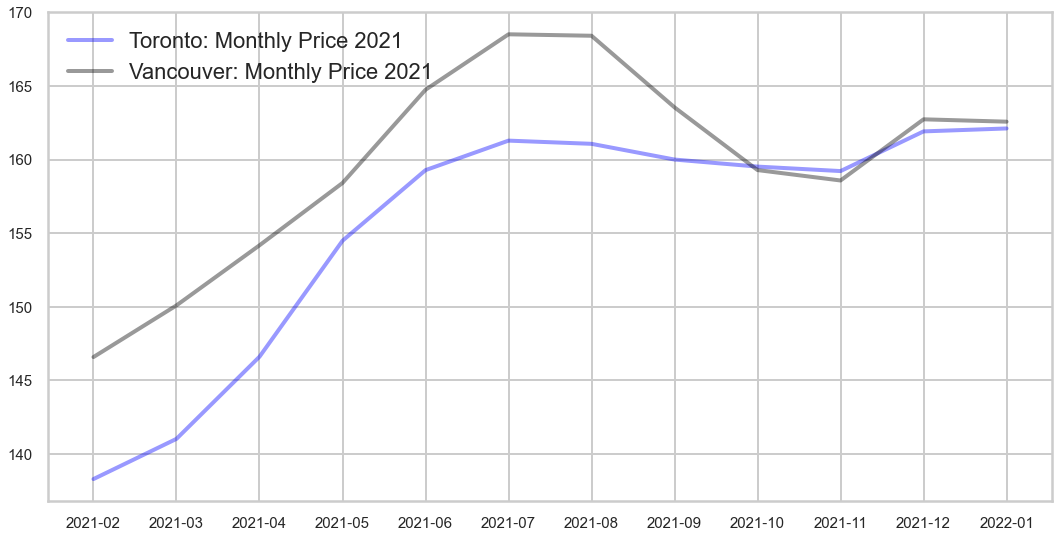

In [ ]:
# line
def plot_trend(data, ax, color, alpha=.7, ls='-', lw=5, label=None):
    ax.plot(data, color=color,
            alpha=alpha, ls=ls,
            linewidth=lw, label=label)

fig, ax = plt.subplots(figsize=(18,9))
#Toronto 2021
plot_tor_cost_pm = tor_cost_pm.reset_index()
plot_tor_cost_pm['date'] = plot_tor_cost_pm['date'].dt.to_period('M').astype(str)
plot_tor_cost_pm = plot_tor_cost_pm.rename(columns={'Price ($)': 'price_tor'})
#Vancouver 2021
plot_van_cost_pm = van_cost_pm.reset_index()
plot_van_cost_pm['date'] = plot_van_cost_pm['date'].dt.to_period('M').astype(str)
plot_van_cost_pm = plot_van_cost_pm.rename(columns={'Price ($)': 'price_van'})

plot_df = plot_tor_cost_pm.merge(plot_van_cost_pm, on='date', how='outer')

plot_trend(plot_df['price_tor'], ax, 'blue', alpha=.4, ls='-', lw=4, label='Toronto: Monthly Price 2021')
plot_trend(plot_df['price_van'], ax, 'black', alpha=.4, ls='-', lw=4, label='Vancouver: Monthly Price 2021')

xtickpos = range(0,len(plot_df['date']))
_ = plt.xticks(ticks = xtickpos, labels = plot_df['date'])

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

h1, l1 = ax.get_legend_handles_labels()
ax.legend(loc=2, frameon=False)

Now, we wish to see the seasonal trend for each city.
Applying the custom normalization to keep in index in the range from 0 to 1.

In [ ]:
#Repeat the previous step but with normalization
tor_group = tor_cc.groupby(['date','listing_id']).mean().unstack(level=1)
tor_avg = pd.DataFrame(tor_group.mean(axis=1), columns=['Index'])
tor_cost_pm = tor_avg.resample('M').mean()
tor_cost_pm = tor_cost_pm.iloc[:-1,:]
tor_cost_pm = tor_cost_pm/tor_cost_pm.max()
tor_cost_pm


,Index
date,
2021-02-28,0.853103
2021-03-31,0.869954
2021-04-30,0.904365
2021-05-31,0.952955
2021-06-30,0.982536
2021-07-31,0.994904
2021-08-31,0.993560
2021-09-30,0.986972
2021-10-31,0.984022


In [ ]:
van_group = van_cc.groupby(['date','listing_id']).mean().unstack(level=1)
van_avg = pd.DataFrame(van_group.mean(axis=1), columns=['Index'])
van_cost_pm = van_avg.resample('M').mean()
van_cost_pm = van_cost_pm.iloc[:-1,:]
van_cost_pm = van_cost_pm/van_cost_pm.max()
van_cost_pm

,Index
date,
2021-02-28,0.869906
2021-03-31,0.890729
2021-04-30,0.914948
2021-05-31,0.940069
2021-06-30,0.977642
2021-07-31,1.000000
2021-08-31,0.999413
2021-09-30,0.970544
2021-10-31,0.945271


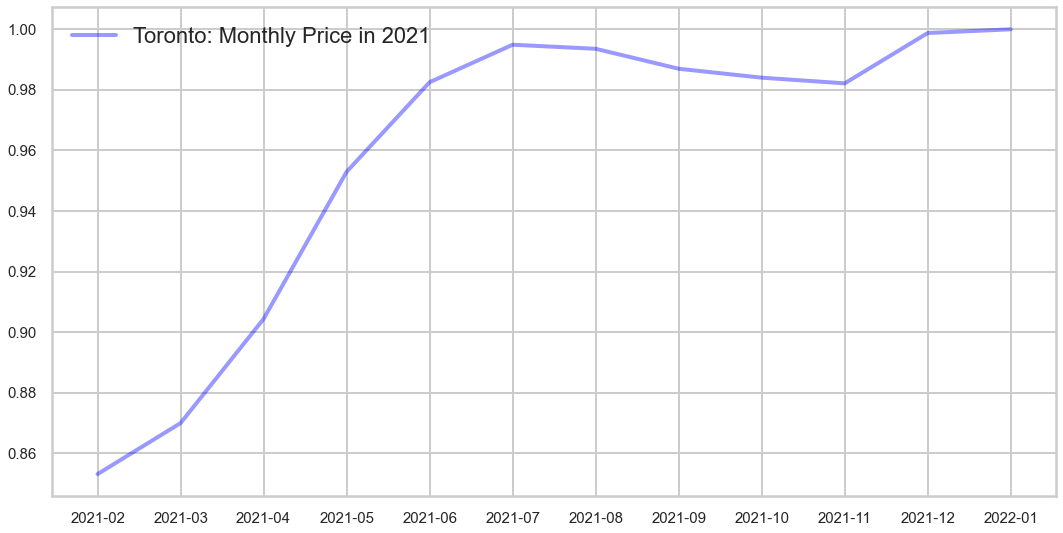

In [ ]:
fig, ax = plt.subplots(figsize=(18,9))

plot_tor_cost_pm = tor_cost_pm.reset_index()
plot_tor_cost_pm['date'] = plot_tor_cost_pm['date'].dt.to_period('M').astype(str)
plot_tor_cost_pm = plot_tor_cost_pm.rename(columns={'Index': 'price_tor'})


plot_trend(plot_tor_cost_pm['price_tor'], ax, 'blue', alpha=.4, ls='-', lw=4, label='Toronto: Monthly Price in 2021')


xtickpos = range(0,len(plot_df['date']))
_ = plt.xticks(ticks = xtickpos, labels = plot_df['date'])

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

h1, l1 = ax.get_legend_handles_labels()
ax.legend(loc=2, frameon=False)

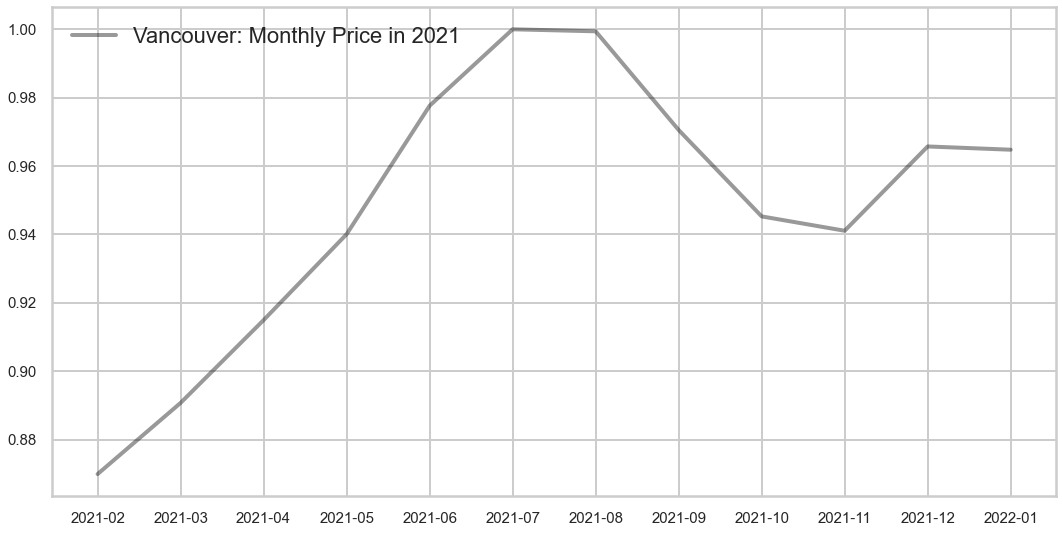

In [ ]:
fig, ax = plt.subplots(figsize=(18,9))

plot_van_cost_pm = van_cost_pm.reset_index()
plot_van_cost_pm['date'] = plot_van_cost_pm['date'].dt.to_period('M').astype(str)
plot_van_cost_pm = plot_van_cost_pm.rename(columns={'Index': 'price_van'})


plot_trend(plot_van_cost_pm['price_van'], ax, 'black', alpha=.4, ls='-', lw=4, label='Vancouver: Monthly Price in 2021')


xtickpos = range(0,len(plot_df['date']))
_ = plt.xticks(ticks = xtickpos, labels = plot_df['date'])

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

h1, l1 = ax.get_legend_handles_labels()
ax.legend(loc=2, frameon=False)

Both cities average listing price in each month in 2020

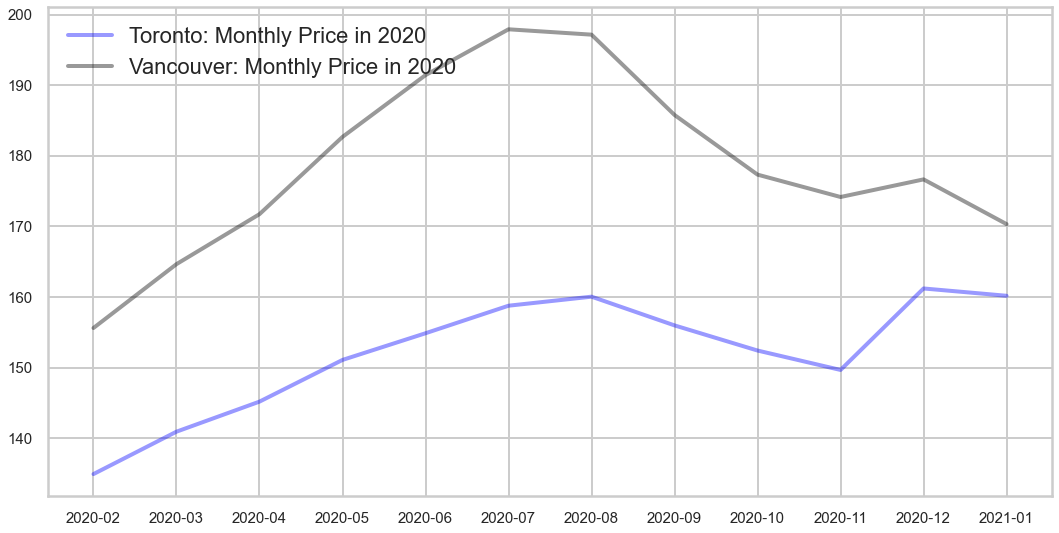

In [ ]:
fig, ax = plt.subplots(figsize=(18,9))

plot_tor_cost_pm2020 = tor_cost_pm2020.reset_index()
plot_tor_cost_pm2020['date'] = plot_tor_cost_pm2020['date'].dt.to_period('M').astype(str)
plot_tor_cost_pm2020 = plot_tor_cost_pm2020.rename(columns={'Price ($)': 'price_tor'})

plot_van_cost_pm2020 = van_cost_pm2020.reset_index()
plot_van_cost_pm2020['date'] = plot_van_cost_pm2020['date'].dt.to_period('M').astype(str)
plot_van_cost_pm2020 = plot_van_cost_pm2020.rename(columns={'Price ($)': 'price_van'})

plot_df = plot_tor_cost_pm2020.merge(plot_van_cost_pm2020, on='date', how='inner')

# Plot both of the seasonal trends onto a graph
plot_trend(plot_df['price_tor'], ax, 'blue', alpha=.4, ls='-', lw=4, label='Toronto: Monthly Price in 2020')
plot_trend(plot_df['price_van'], ax, 'black', alpha=.4, ls='-', lw=4, label='Vancouver: Monthly Price in 2020')

# Set the x-labels and y limits  
xtickpos = range(0,len(plot_df['date']))
_ = plt.xticks(ticks = xtickpos, labels = plot_df['date'])

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

# Plots the Legend
h1, l1 = ax.get_legend_handles_labels()
ax.legend(loc=2, frameon=False)

Toronto listing price seasonality with normalization in 2020

In [ ]:
#Repeat the previous step but with normalization
tor_group2020 = tor_cc2020.groupby(['date','listing_id']).mean().unstack(level=1)
tor_avg2020 = pd.DataFrame(tor_group2020.mean(axis=1), columns=['Index'])
tor_cost_pm2020 = tor_avg2020.resample('M').mean()
tor_cost_pm2020 = tor_cost_pm2020.iloc[:-1,:]
tor_cost_pm2020 = tor_cost_pm2020/tor_cost_pm2020.max()
tor_cost_pm2020

,Index
date,
2020-02-29,0.837077
2020-03-31,0.874287
2020-04-30,0.900670
2020-05-31,0.937270
2020-06-30,0.960687
2020-07-31,0.984864
2020-08-31,0.992799
2020-09-30,0.967578
2020-10-31,0.945510


Vancouver listing price seasonality with normalization in 2020

In [ ]:
van_group2020 = van_cc2020.groupby(['date','listing_id']).mean().unstack(level=1)
van_avg2020 = pd.DataFrame(van_group2020.mean(axis=1), columns=['Index'])
van_cost_pm2020 = van_avg2020.resample('M').mean()
van_cost_pm2020 = van_cost_pm2020/van_cost_pm2020.max()
van_cost_pm2020

,Index
date,
2020-01-31,0.763811
2020-02-29,0.786395
2020-03-31,0.832064
2020-04-30,0.867798
2020-05-31,0.923048
2020-06-30,0.967233
2020-07-31,1.000000
2020-08-31,0.996168
2020-09-30,0.938723


Generate Toronto seasonal trend with normalization

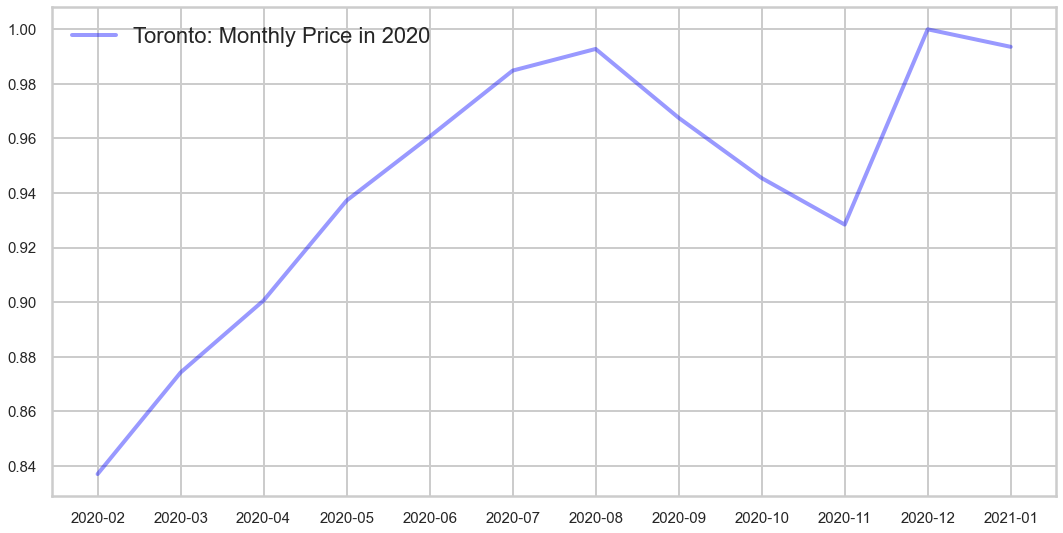

In [ ]:
fig, ax = plt.subplots(figsize=(18,9))

plot_tor_cost_pm2020 = tor_cost_pm2020.reset_index()
plot_tor_cost_pm2020['date'] = plot_tor_cost_pm2020['date'].dt.to_period('M').astype(str)
plot_tor_cost_pm2020 = plot_tor_cost_pm2020.rename(columns={'Index': 'price_tor2020'})

plot_trend(plot_tor_cost_pm2020['price_tor2020'], ax, 'blue', alpha=.4, ls='-', lw=4, label='Toronto: Monthly Price in 2020')

xtickpos = range(0,len(plot_df['date']))
_ = plt.xticks(ticks = xtickpos, labels = plot_df['date'])

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

h1, l1 = ax.get_legend_handles_labels()
ax.legend(loc=2, frameon=False)

Generate Vancouver seasonal trend with normalization

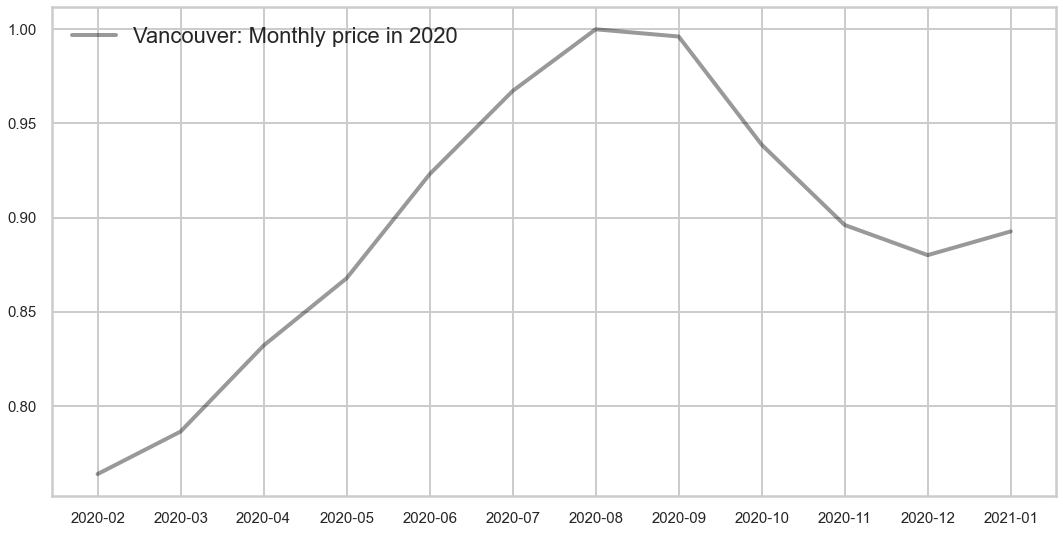

In [ ]:
van_cost_pm2020 = van_cost_pm2020.iloc[:-1,:]

fig, ax = plt.subplots(figsize=(18,9))

plot_van_cost_pm2020 = van_cost_pm2020.reset_index()
plot_van_cost_pm2020['date'] = plot_van_cost_pm2020['date'].dt.to_period('M').astype(str)
plot_van_cost_pm2020 = plot_van_cost_pm2020.rename(columns={'Index': 'price_van2020'})

plot_trend(plot_van_cost_pm2020['price_van2020'], ax, 'black', alpha=.4, ls='-', lw=4, label='Vancouver: Monthly price in 2020')

xtickpos = range(0,len(plot_df['date']))
_ = plt.xticks(ticks = xtickpos, labels = plot_df['date'])

for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(15)

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(15) 

h1, l1 = ax.get_legend_handles_labels()
ax.legend(loc=2, frameon=False)